# Scientific Computing Session 7
## Ruize Li
## CRSid: rl737
## Jesus College


In [1]:
# Importing needed libraries
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
from numpy.random import rand, randn   # to generate random matrices
from scipy.optimize import minimize    # For minimisations we will use as part of a program
from numpy.linalg import inv # Matrix inversion routine from the linear algbra package in NumPy
from numpy.linalg import eig # linear algebra eigen-solver
from numpy.linalg import det # determinant of a matrix

np.set_printoptions(suppress=True) # to make tiny values appear as zero
np.set_printoptions(precision=4)   # number of digits in floats (or longfloats)
#np.set_printoptions(formatter={'float_kind':"{:.2f}"})
#np.set_printoptions()

# Set font for labels in coming figures
font16 = {'family': 'serif',
          'color':  'black',
          'weight': 'normal',
          'size': 16,
          }

# Set font for labels in coming figures
font20 = {'family': 'serif',
          'color':  'black',
          'weight': 'normal',
          'size': 20,
          }

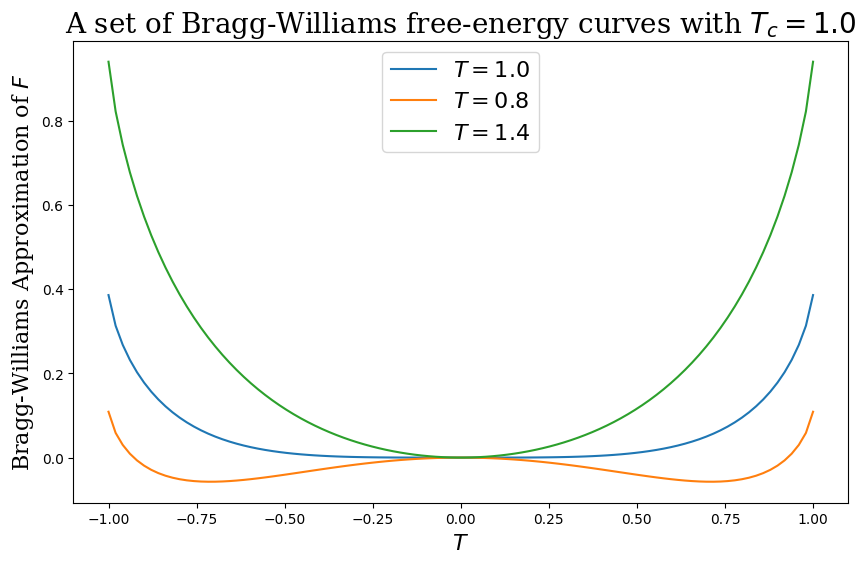

In [2]:
# Define the bw function
def bw(q,Tc,T):
    eps = 10**(-5)    # avoid the precence of 0 in ln()
    q1 = 1 + q
    q2 = 1 - q

    for i in range(len(q)):
      if abs(q1[i]) < eps:
        q1[i] = eps
      if abs(q2[i]) < eps:
        q2[i] = eps

    bw = -Tc*q**2 + T*((q1)*np.log(q1)+(q2)*np.log(q2))
    return bw

qq = np.linspace(-1.,1.,100)   # set q to be in (-1,1)

plt.figure(figsize=(10,6))    # set an appropriate figure size
plt.title('A set of Bragg-Williams free-energy curves with $T_c=1.0$',fontdict=font20)
plt.xlabel('$T$',fontdict=font16)
plt.ylabel('Bragg-Williams Approximation of $F$',fontdict=font16)
plt.plot(qq,bw(qq,1.,1.),label='$T=1.0$')   # Plot of bw with T_c=1.0, T=1.0
plt.plot(qq,bw(qq,1.,.8),label='$T=0.8$')   # Plot of bw with T_c=1.0, T=0.8
plt.plot(qq,bw(qq,1.,1.4),label='$T=1.4$')    # Plot of bw with T_c=1.0, T=1.4
plt.legend(fontsize=16)
plt.show()

In [3]:
T = 0.5   # initial value of T
Qe = np.zeros((201,1))    # Qe, prepared for the next section
Te = np.zeros((201,1))    # Te, prepared for the next setion to be the x values.

for i in range(201):    # To make sure T is between 0.5 and 1.2
  def bwf(q):   # reducing bw function to single variable, actually just bw with fixed T and Tc
    eps = 10**(-5)    # avoid the presence of 0 in ln()
    q1 = 1 + q
    q2 = 1 - q

    for j in range(len(q)):
      if abs(q1[j]) < eps:
        q1[j] = eps
      if abs(q2[j]) < eps:
        q2[j] = eps

    bwf = -q**2 + T*((q1)*np.log(q1)+(q2)*np.log(q2))
    return bwf
  q0 = 0.9    # initial value of q
  res = minimize(bwf, q0, method='nelder-mead',options={'xatol': 1e-8})   # find the local minimum
  print('When T=',round(T,4),', Qe=',res.x) # print out the data
  Qe[i] = res.x # note down Qe at this T
  Te[i] = T
  T = T + 0.0035

When T= 0.5 , Qe= [0.9575]
When T= 0.5035 , Qe= [0.9562]
When T= 0.507 , Qe= [0.9548]
When T= 0.5105 , Qe= [0.9534]
When T= 0.514 , Qe= [0.9519]
When T= 0.5175 , Qe= [0.9505]
When T= 0.521 , Qe= [0.949]
When T= 0.5245 , Qe= [0.9475]
When T= 0.528 , Qe= [0.9459]
When T= 0.5315 , Qe= [0.9443]
When T= 0.535 , Qe= [0.9427]
When T= 0.5385 , Qe= [0.9411]
When T= 0.542 , Qe= [0.9394]
When T= 0.5455 , Qe= [0.9378]
When T= 0.549 , Qe= [0.936]
When T= 0.5525 , Qe= [0.9343]
When T= 0.556 , Qe= [0.9325]
When T= 0.5595 , Qe= [0.9307]
When T= 0.563 , Qe= [0.9288]
When T= 0.5665 , Qe= [0.927]
When T= 0.57 , Qe= [0.925]
When T= 0.5735 , Qe= [0.9231]
When T= 0.577 , Qe= [0.9211]
When T= 0.5805 , Qe= [0.9191]
When T= 0.584 , Qe= [0.9171]
When T= 0.5875 , Qe= [0.915]
When T= 0.591 , Qe= [0.9129]
When T= 0.5945 , Qe= [0.9108]
When T= 0.598 , Qe= [0.9086]
When T= 0.6015 , Qe= [0.9064]
When T= 0.605 , Qe= [0.9041]
When T= 0.6085 , Qe= [0.9019]
When T= 0.612 , Qe= [0.8995]
When T= 0.6155 , Qe= [0.8972]
When 

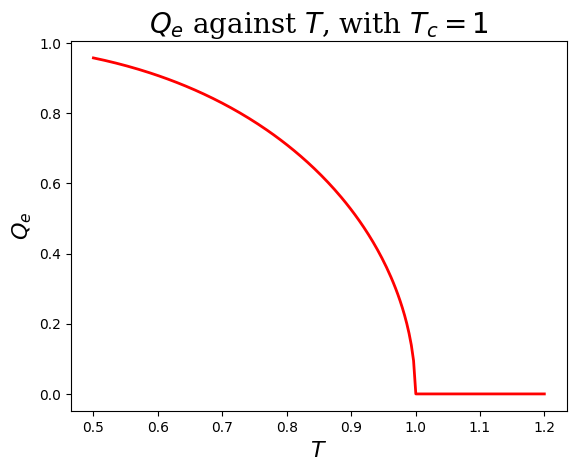

In [4]:
plt.title('$Q_e$ against $T$, with $T_c=1$',fontdict=font20)
plt.xlabel('$T$',fontdict=font16)
plt.ylabel('$Q_e$',fontdict=font16)
plt.plot(Te,Qe,linewidth=2.0,color='red')
plt.savefig('session7fig.png',dpi=300)
plt.show()